In [225]:
import pandas as pd

In [226]:
data = pd.read_csv("thanksgiving-2015-poll-data.csv", encoding="Latin-1")
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [227]:
data.shape

(1058, 65)

In [228]:
data["Do you celebrate Thanksgiving?"].unique()

array(['Yes', 'No'], dtype=object)

In [229]:
data["Do you celebrate Thanksgiving?"].value_counts(dropna=False)

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [230]:
data.columns[50:]

Index(['Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify).1',
       'Do you typically pray before or after the Thanksgiving meal?',
       'How far will you travel for Thanksgiving?',
       'Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade',
       'What's the age cutoff at your "kids' table" at Thanksgiving?',
       'Have you ever tried to meet up with hometown friends on Thanksgiving night?',
       'Have you ever attended a "Friendsgiving?"',
       'Will you shop any Black Friday sales on Thanksgiving Day?',
       'Do you work in retail?',
       'Will you employer make you work on Black Friday?',
       'How would you describe where you live?', 'Age', 'What is your gender?',
       'How much total combined money did all members of your HOUSEHOLD earn last year?',
       'US Region'],
      dtype='object')

In [231]:
data["What is your gender?"].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [232]:
data["What is your gender?"].head()

0      Male
1    Female
2      Male
3      Male
4      Male
Name: What is your gender?, dtype: object

In [233]:
import math

def gender_code(gender_string):
    if isinstance(gender_string, int) and math.isnan(general_string):
        return gender_string
    return int(gender_string == "Female")


In [234]:
data["gender"] = data["What is your gender?"].apply(gender_code)
data["gender"].value_counts(dropna = False)

1    544
0    514
Name: gender, dtype: int64

In [235]:
data.gender.head()

0    0
1    1
2    0
3    0
4    0
Name: gender, dtype: int64

In [236]:
data.apply(lambda x: x.dtype).head()

RespondentID                                                                             object
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

In [237]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts()

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [238]:
import numpy as np
def clean_income(value):
        if value == "$200,000 and up":
            return 200000
        elif value == "Prefer not to answer":
            return np.nan
        elif isinstance(value, float) and math.isnan(value):
            return np.nan
        value = value.replace(",", "").replace("$","")
        income_high, income_low = value.split("to")
        return int(income_high) + int(income_low)/2
        
            

In [239]:
data["income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)

In [240]:
data.income.head()

0    124999.5
1     87499.5
2      4999.5
3    200000.0
4    162499.5
Name: income, dtype: float64

In [241]:
data["What type of cranberry saucedo you typically have?"].value_counts()



Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [242]:
homemade = data[data["What type of cranberry saucedo you typically have?"] == "Homemade"]
homemade.shape

(301, 67)

In [243]:
canned = data[data["What type of cranberry saucedo you typically have?"] == "Canned"]
canned.shape

(502, 67)

In [244]:
print((homemade["income"]).mean())

124341.67004048583


In [245]:
homemade["income"].max()
homemade["income"].min()

4999.5

In [246]:
canned["income"].mean()

112419.99431818182

In [247]:
grouped = data.groupby("What type of cranberry saucedo you typically have?")
grouped.groups

{'Canned': Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
             ...
             1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
            dtype='int64', length=502),
 'Homemade': Int64Index([   2,    3,    5,    7,   13,   14,   16,   20,   21,   23,
             ...
             1016, 1017, 1025, 1027, 1030, 1034, 1048, 1049, 1053, 1056],
            dtype='int64', length=301),
 'None': Int64Index([   0,   17,   24,   29,   34,   36,   40,   47,   49,   51,
             ...
              980,  981,  997, 1015, 1018, 1031, 1037, 1043, 1050, 1055],
            dtype='int64', length=146),
 'Other (please specify)': Int64Index([   1,    9,  154,  216,  221,  233,  249,  265,  301,  336,  380,
              435,  444,  447,  513,  550,  749,  750,  784,  807,  860,  872,
              905, 1000, 1007],
            dtype='int64')}

In [248]:
grouped.size()


What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [249]:
for name, group in grouped:
    print(name)
    print(group.shape)

Canned
(502, 67)
Homemade
(301, 67)
None
(146, 67)
Other (please specify)
(25, 67)


In [250]:
# we can also make a group of one column
grouped["income"].size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [251]:
grouped["income"].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    112419.994318
Homemade                  124341.670040
None                      107121.378151
Other (please specify)    115651.717391
Name: income, dtype: float64

In [252]:
grouped.agg(np.mean)

,RespondentID,gender,income
What type of cranberry saucedo you typically have?,,,
Canned,4.336699e+09,0.541833,112419.994318
Homemade,4.336792e+09,0.508306,124341.670040
None,4.336765e+09,0.506849,107121.378151
Other (please specify),4.336763e+09,0.640000,115651.717391


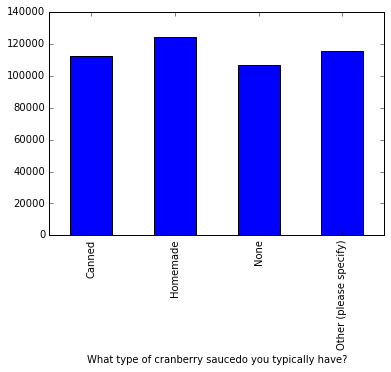

In [253]:
%matplotlib inline
sauce = grouped.agg(np.mean)
sauce["income"].plot(kind = "bar")

In [254]:
grouped = data.groupby(["What type of cranberry saucedo you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])

In [255]:
grouped.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                             4.336354e+09   
                                                   Ham/Pork                                            4.336757e+09   
                                                   I don't know                                        4.335987e+09   
                                                   Other (please specify)                              4.336682e+09   
                                                   Roast beef                                          4.336254e+09   
                                                   Tofurkey                                            4.337157e+09   
                                                   Turkey                                              4.336705e+09   
Homemade                                           Chicken                                             4.336540e+09   
                                                   Ham/Pork                                            4.337253e+09   
                                                   I don't know                                        4.336084e+09   
                                                   Other (please specify)                              4.336863e+09   
                                                   Roast beef                                          4.336174e+09   
                                                   Tofurkey                                            4.336790e+09   
                                                   Turducken                                           4.337475e+09   
                                                   Turkey                                              4.336791e+09   
None                                               Chicken                                             4.336151e+09   
                                                   Ham/Pork                                            4.336680e+09   
                                                   I don't know                                        4.336412e+09   
                                                   Other (please specify)                              4.336688e+09   
                                                   Roast beef                                          4.337424e+09   
                                                   Tofurkey                                            4.336950e+09   
                                                   Turducken                                           4.336739e+09   
                                                   Turkey                                              4.336784e+09   
Other (please specify)                             Ham/Pork                                            4.336465e+09   
                                                   Other (please specify)                              4.337335e+09   
                                                   Tofurkey                                            4.336122e+09   
                                                   Turkey                                              4.336724e+09   

                                                                                                         gender  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                             0.333333   
                                                   Ham/Pork                                            0.600000   
                                                   I don't know                                        0.000000   
                                                   Other (please specify)   

In [256]:
grouped["income"].agg([np.mean, np.max, np.min, np.std]).head(10)

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              96999.600000   
                                                   Ham/Pork                                            103749.535714   
                                                   I don't know                                          4999.500000   
                                                   Other (please specify)                               74285.214286   
                                                   Roast beef                                           33999.500000   
                                                   Tofurkey                                            131785.285714   
                                                   Turkey                                              114488.317955   
Homemade                                           Chicken                                              25832.833333   
                                                   Ham/Pork                                            115624.625000   
                                                   I don't know                                                  NaN   

                                                                                                           amax  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                             200000.0   
                                                   Ham/Pork                                            237499.5   
                                                   I don't know                                          4999.5   
                                                   Other (please specify)                              124999.5   
                                                   Roast beef                                           87499.5   
                                                   Tofurkey                                            200000.0   
                                                   Turkey                                              274999.5   
Homemade                                           Chicken                                              49999.5   
                                                   Ham/Pork                                            200000.0   
                                                   I don't know                                             NaN   

                                                                                                          amin  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...            
Canned                                             Chicken                                             22499.5   
                                                   Ham/Pork                                             4999.5   
                                                   I don't know                                         4999.5   
                                                   Other (please specify)                              22499.5   
                                                   Roast beef                                           4999.5   
                                                   Tofurkey                                            22499.5   
                                                   Turkey                                               4999.5   
Homemade                                           Chicken                                              4999.5   
                                                   Ham/Pork                                            49999.5   
                                    

In [257]:
grouped = data.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]
grouped.apply(lambda x : x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        I don't know                3
                                        Tofurkey                    3
                                        Chicken                     2
                                        Turducken                   2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Chicken                     3
                           

In [258]:
#Note: Reference Article http://www.dataquest.io/blog/pandas-tutorial-python-2/